## Load data

In [1]:
import pandas as pd
import numpy as np

In [55]:
# MRELBP
#file = "./lbp_riu2_comb_top10_euc.txt"
file = "./stsim_1_result.txt"
#file = "./stsim_m_top10_maha.txt"
#file = "./stsim_2_global_result.txt"
#file = "./mbp_top10.txt"
with open(file) as f:
    data = f.readlines()
    top10 = []
    tscore = []
    for line in data:
        line = line.strip().split(",")
        top10.append(line[:11])
        tscore.append(line[11:])

In [56]:
tscore[0]

['1.0',
 '0.856966495513916',
 '0.8538432717323303',
 '0.8537165522575378',
 '0.8436694145202637',
 '0.8435336947441101',
 '0.842377245426178',
 '0.8413735032081604',
 '0.8412961363792419',
 '0.8402002453804016']

In [57]:
df = pd.DataFrame(top10)
df.columns = ["query_image","1","2","3","4","5","6","7","8","9","10"]

In [58]:
df.head()

,query_image,1,2,3,4,5,6,7,8,9,10
0,CB054029_0_gray.tiff,CB054029_0_gray.tiff,42-17689005_0_d_gray.tiff,CB054029_2_gray.tiff,42-17689005_1_d_gray.tiff,42-23407850_1_d_gray.tiff,AABY0066_1_d_gray.tiff,UL782571_5_gray.tiff,CB054029_1_gray.tiff,SP003971_0_d_gray.tiff,AABY0066_2_d_gray.tiff
1,42-19050178_0_d_gray.tiff,42-19050178_0_d_gray.tiff,42-19050178_2_d_gray.tiff,42-19050178_1_d_gray.tiff,42-20729616_01_gray.tiff,42-20729616_00_gray.tiff,70870_0_d_gray.tiff,42-20729593_02_gray.tiff,70870_1_d_gray.tiff,70870_2_d_gray.tiff,42-20729593_01_gray.tiff
2,RF249112_2_gray.tiff,RF249112_2_gray.tiff,42-15682012_2_gray.tiff,RF249112_1_gray.tiff,42-17689005_1_d_gray.tiff,UL782571_5_gray.tiff,UL782571_3_gray.tiff,42-23407850_1_d_gray.tiff,AABY0066_1_d_gray.tiff,42-20081755_00_d_gray.tiff,42-17689005_0_d_gray.tiff
3,42-23407850_0_d_gray.tiff,42-23407850_0_d_gray.tiff,42-23407850_1_d_gray.tiff,AAEG001023_1_gray.tiff,AAEG001023_0_gray.tiff,42-19883667_01_d_gray.tiff,42-20081755_01_d_gray.tiff,42-19883667_00_d_gray.tiff,AAEG001023_2_gray.tiff,42-16850244_0_gray.tiff,42-15682012_2_gray.tiff
4,42-21225078_02_gray.tiff,42-21225078_02_gray.tiff,7569_0_gray.tiff,42-21225078_03_gray.tiff,7569_2_gray.tiff,7569_1_gray.tiff,70061_2_d_gray.tiff,42-24104931_0_gray.tiff,70061_0_d_gray.tiff,70061_1_d_gray.tiff,42-17361516_1_d_gray.tiff


### for corbis128_gray

In [59]:
def is_d(l):
    return ("d" in l)
def is_relevant(a, b):
    # a,b -> str
    a = a.split("_")
    b = b.split("_")
    is_a_d = is_d(a)
    is_b_d = is_d(b)
    if (is_a_d and is_b_d) or (not is_a_d and not is_b_d):
        return (a[0]==b[0])
    else:
        return False
    

### preprocess

In [60]:
for i in range(1,11):
    df["rele_%d"%i] = (df.apply(lambda row: is_relevant(row['%d'%i], row["query_image"]),axis=1)).astype(int)
df.head()

,query_image,1,2,3,4,5,6,7,8,9,...,rele_1,rele_2,rele_3,rele_4,rele_5,rele_6,rele_7,rele_8,rele_9,rele_10
0,CB054029_0_gray.tiff,CB054029_0_gray.tiff,42-17689005_0_d_gray.tiff,CB054029_2_gray.tiff,42-17689005_1_d_gray.tiff,42-23407850_1_d_gray.tiff,AABY0066_1_d_gray.tiff,UL782571_5_gray.tiff,CB054029_1_gray.tiff,SP003971_0_d_gray.tiff,...,1,0,1,0,0,0,0,1,0,0
1,42-19050178_0_d_gray.tiff,42-19050178_0_d_gray.tiff,42-19050178_2_d_gray.tiff,42-19050178_1_d_gray.tiff,42-20729616_01_gray.tiff,42-20729616_00_gray.tiff,70870_0_d_gray.tiff,42-20729593_02_gray.tiff,70870_1_d_gray.tiff,70870_2_d_gray.tiff,...,1,1,1,0,0,0,0,0,0,0
2,RF249112_2_gray.tiff,RF249112_2_gray.tiff,42-15682012_2_gray.tiff,RF249112_1_gray.tiff,42-17689005_1_d_gray.tiff,UL782571_5_gray.tiff,UL782571_3_gray.tiff,42-23407850_1_d_gray.tiff,AABY0066_1_d_gray.tiff,42-20081755_00_d_gray.tiff,...,1,0,1,0,0,0,0,0,0,0
3,42-23407850_0_d_gray.tiff,42-23407850_0_d_gray.tiff,42-23407850_1_d_gray.tiff,AAEG001023_1_gray.tiff,AAEG001023_0_gray.tiff,42-19883667_01_d_gray.tiff,42-20081755_01_d_gray.tiff,42-19883667_00_d_gray.tiff,AAEG001023_2_gray.tiff,42-16850244_0_gray.tiff,...,1,1,0,0,0,0,0,0,0,0
4,42-21225078_02_gray.tiff,42-21225078_02_gray.tiff,7569_0_gray.tiff,42-21225078_03_gray.tiff,7569_2_gray.tiff,7569_1_gray.tiff,70061_2_d_gray.tiff,42-24104931_0_gray.tiff,70061_0_d_gray.tiff,70061_1_d_gray.tiff,...,1,0,1,0,0,0,0,0,0,0


In [61]:
df_mrr = df.iloc[:,12:]
df_mrr.head(10)

,rele_2,rele_3,rele_4,rele_5,rele_6,rele_7,rele_8,rele_9,rele_10
0,0,1,0,0,0,0,1,0,0
1,1,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0
6,1,1,0,0,0,0,0,0,0
7,0,0,0,0,0,1,0,0,0
8,0,0,0,1,0,0,0,0,0
9,0,0,1,0,0,0,0,1,0


In [62]:
df[df["rele_2"]==0]

,query_image,1,2,3,4,5,6,7,8,9,...,rele_1,rele_2,rele_3,rele_4,rele_5,rele_6,rele_7,rele_8,rele_9,rele_10
0,CB054029_0_gray.tiff,CB054029_0_gray.tiff,42-17689005_0_d_gray.tiff,CB054029_2_gray.tiff,42-17689005_1_d_gray.tiff,42-23407850_1_d_gray.tiff,AABY0066_1_d_gray.tiff,UL782571_5_gray.tiff,CB054029_1_gray.tiff,SP003971_0_d_gray.tiff,...,1,0,1,0,0,0,0,1,0,0
2,RF249112_2_gray.tiff,RF249112_2_gray.tiff,42-15682012_2_gray.tiff,RF249112_1_gray.tiff,42-17689005_1_d_gray.tiff,UL782571_5_gray.tiff,UL782571_3_gray.tiff,42-23407850_1_d_gray.tiff,AABY0066_1_d_gray.tiff,42-20081755_00_d_gray.tiff,...,1,0,1,0,0,0,0,0,0,0
4,42-21225078_02_gray.tiff,42-21225078_02_gray.tiff,7569_0_gray.tiff,42-21225078_03_gray.tiff,7569_2_gray.tiff,7569_1_gray.tiff,70061_2_d_gray.tiff,42-24104931_0_gray.tiff,70061_0_d_gray.tiff,70061_1_d_gray.tiff,...,1,0,1,0,0,0,0,0,0,0
7,66225_1_d_gray.tiff,66225_1_d_gray.tiff,42-16712641_0_gray.tiff,42-16712641_2_gray.tiff,42-21364266_02_gray.tiff,42-21364266_00_gray.tiff,42-21474819_01_d_gray.tiff,66225_0_d_gray.tiff,CB045931_1_d_gray.tiff,42-16712641_1_gray.tiff,...,1,0,0,0,0,0,1,0,0,0
8,42-16811753_0_d_gray.tiff,42-16811753_0_d_gray.tiff,42-16811752_0_d_gray.tiff,42-16811752_1_d_gray.tiff,42-23791059_2_gray.tiff,42-16811753_1_d_gray.tiff,42-23791059_1_gray.tiff,42-23791059_0_gray.tiff,42-17307975_1_d_gray.tiff,42-17307975_0_d_gray.tiff,...,1,0,0,0,1,0,0,0,0,0
9,AADJ001139_0_d_gray.tiff,AADJ001139_0_d_gray.tiff,CB053273_01_d_gray.tiff,CB053273_00_d_gray.tiff,AADJ001139_2_d_gray.tiff,42-21024596_0_gray.tiff,42-21024596_2_gray.tiff,42-24584425_2_d_gray.tiff,RF249152_01_gray.tiff,AADJ001139_1_d_gray.tiff,...,1,0,0,1,0,0,0,0,1,0
10,UM002462_00_d_gray.tiff,UM002462_00_d_gray.tiff,01791000638_01_d_gray.tiff,42-24281653_1_gray.tiff,42-24281653_0_gray.tiff,42-18392772_02_gray.tiff,CB053273_00_d_gray.tiff,CB053273_01_d_gray.tiff,RF249152_01_gray.tiff,42-18392772_03_gray.tiff,...,1,0,0,0,0,0,0,0,0,0
11,7641_0_d_gray.tiff,7641_0_d_gray.tiff,GB001039_03_d_gray.tiff,PJ013506_4_gray.tiff,PJ013506_5_gray.tiff,42-22046428_0_gray.tiff,PJ013506_2_gray.tiff,GB001039_02_d_gray.tiff,7641_1_d_gray.tiff,42-21866501_1_gray.tiff,...,1,0,0,0,0,0,0,1,0,0
13,42-23407482_2_gray.tiff,42-23407482_2_gray.tiff,42-15195210_0_d_gray.tiff,42-18901270_01_d_gray.tiff,70210_1_d_gray.tiff,42-20783309_2_gray.tiff,42-23407482_0_gray.tiff,42-15195210_2_d_gray.tiff,42-20580392_02_gray.tiff,CB064272_3_gray.tiff,...,1,0,0,0,0,1,0,0,0,0
15,42-22098003_2_d_gray.tiff,42-22098003_2_d_gray.tiff,42-16394350_1_gray.tiff,42-16394350_2_gray.tiff,42-16394350_0_gray.tiff,42-19248562_01_d_gray.tiff,42-22098003_1_d_gray.tiff,42-19248562_00_d_gray.tiff,42-22098003_0_d_gray.tiff,42-24516163_2_gray.tiff,...,1,0,0,0,0,1,0,1,0,0


In [63]:
rs_mrr = df_mrr.as_matrix()
rs_mrr

/Users/yuxiao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[0, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0]])

## Precision @ One

In [64]:
def precision_at_k(r, k):
    assert k >= 1
    r = np.asarray(r)[:k] != 0
    if r.size != k:
        raise ValueError('Relevance score length < k')
    return np.mean(r)
def mean_precision_at_1(rs):
    return np.mean([precision_at_k(r, 1) for r in rs])

In [65]:
mean_precision_at_1(rs_mrr)

0.7341236240474175

## Mean Average Precision

In [66]:
def average_precision(r):
    r = np.asarray(r) != 0
    out = [precision_at_k(r, k + 1) for k in range(r.size) if r[k]]
    if not out:
        return 0.
    return np.mean(out)
def mean_average_precision(rs): 
    return np.mean([average_precision(r) for r in rs])

In [67]:
mean_average_precision(rs_mrr)

0.7543313105654342

## Mean Reciprocal Rank

In [68]:
def mean_reciprocal_rank(rs):
    rs = (np.asarray(r).nonzero()[0] for r in rs)
    return np.mean([1. / (r[0] + 1.) if r.size else 0. for r in rs])

In [69]:
mean_reciprocal_rank(rs_mrr)

0.7864037740413693

## ROC

In [70]:
score = []
for i in range(len(tscore)):
    s = ",".join(tscore[i])
    score.append(list(map(float,s.split(",")[1:])))

In [71]:
s = np.array(score).reshape(-1,9)

In [72]:
test = []
for i in range(len(s)):
    test.append(list(zip(rs_mrr[i],s[i])))

In [73]:
def regularization(data):
    data = np.array(data)
    data_normed = data / data.max(axis=0)
    return data_normed

In [74]:
test_normed = list(map(regularization,test))
test_normed = np.nan_to_num(test_normed)

/Users/yuxiao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [75]:
len(test_normed)

1181

In [76]:
test_normed.shape

(1181, 9, 2)

In [77]:
test_normed[0]

array([[0.        , 1.        ],
       [1.        , 0.99635549],
       [0.        , 0.99620762],
       [0.        , 0.98448355],
       [0.        , 0.98432517],
       [0.        , 0.98297571],
       [1.        , 0.98180443],
       [0.        , 0.98171415],
       [0.        , 0.98043535]])

### draw roc curve

In [78]:
FPR = np.zeros((100,1))    #1-specificity
TPR = np.zeros((100,1))    #sensitivity
m, n, _ = np.shape(test_normed)#m=1181,n=9
for k in range(100):
    TP = 0  # true positive
    FN = 0  # ture negative
    FP = 0  # false positive
    TN = 0  # true negative
    threshold = float(k / 30.0)
    for i in range(m):
        for j in range(n):
            label = test_normed[i][j][0]
            score = test_normed[i][j][1]
            if score <= threshold:
                pred = 1.
            else:
                pred = 0.
            #if abs(label-1.0)<1e-7 and abs(pred-1.0)<1e-7:#true positive
            if label==1. and pred==1.:
                TP += 1
            #elif abs(label-1.0)<1e-7 and abs(pred-0.0)<1e-7:#false positive
            elif label==1. and pred==0.:
                FN += 1
            #elif abs(label-0.0)<1e-7 and abs(pred-0.0)<1e-7:#true negative
            elif label==0. and pred==0.:
                TN += 1
            #elif abs(label-0.0)<1e-7 and abs(pred-1.0)<1e-7:#false positive
            elif label==0. and pred==1.:
                FP += 1
    # kth (x,y)
    TPR[k] = float(TP/(TP+FN))
    FPR[k] = float(FP/(TN+FP))

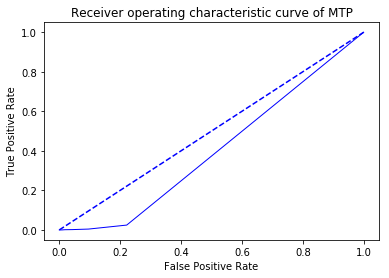

In [79]:
from matplotlib import pyplot as plt
plt.plot([0, 1], [0, 1], '--', color=(0 , 0, 1))
plt.plot(FPR, TPR, "b", linewidth=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve of MTP')
plt.show()

In [80]:
from sklearn.metrics import roc_curve, auc
roc_auc = auc(FPR, TPR)
print('Auc=',roc_auc)

Auc= 0.4007486666049224
